# About Me w/ SKY_TKP

This notebook explores the sampling distributions of several probability distributions: Uniform, Binomial, and Poisson. For each distribution, we generate multiple samples of different sizes and plot the histogram of sample means. We then compare these empirical distributions with the theoretical sampling distributions, which are expected to be approximately normal based on the Central Limit Theorem.

---
## The Central Limit Theorem


***The Central Limit Theorem (CLT)*** is a fundamental concept in probability and statistics. It essentially states that, regardless of the original population distribution, the sampling distribution of the sample mean approaches a normal distribution as the sample size increases.

**In simpler terms:** If you take many random samples from any population and calculate the mean of each sample, the distribution of these sample means will be approximately normal, even if the original population isn't normally distributed.


### Mathematical Formulation

Let $X_1, X_2, ..., X_n$ be a random sample of size $n$ drawn from a population with mean $\mu$ and standard deviation $\sigma$. Then, the sampling distribution of the sample mean $\bar{X}$ can be approximated by a normal distribution with:

* **Mean:**  $E(\bar{X}) = \mu$
* **Standard Deviation:** $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$

We can express this mathematically as:

$$\bar{X} \approx N(\mu, \frac{\sigma}{\sqrt{n}}) \text{ as } n \to \infty$$

where $N(\mu, \sigma)$ represents a normal distribution with mean $\mu$ and standard deviation $\sigma$.


### Significance

The Central Limit Theorem has wide-ranging applications in statistics and data analysis. It allows us to:

* **Make inferences about population parameters:** We can use the normal distribution to make inferences about the population mean, even if the population distribution is unknown or not normal.
* **Construct confidence intervals:** The CLT helps us build confidence intervals for population parameters, providing a range of plausible values for the true parameter.
* **Perform hypothesis testing:** We can utilize the normal distribution to conduct hypothesis tests about the population mean.


### Example

Imagine you are interested in the average height of all students at a university. You don't know the true population distribution of student heights. However, you can take multiple random samples of students, calculate the average height of each sample, and plot the distribution of these sample means. According to the CLT, this distribution of sample means will be approximately normal, even if the population distribution of heights isn't normal.



<br>

[Here's a great video illustrating the Central Limit Theorem.](https://www.youtube.com/watch?v=YAlJCEDH2uY)




---
## Unifrom (Discrete) Distribution

* **Population Distribution:**  Discrete uniform distribution over the range {1, 2, 3, 4, 5, 6}.
* **PMF:**
    $$P(X = x) = \frac{1}{6}, \quad x \in \{1, 2, 3, 4, 5, 6\}$$
* **Sampling Distribution:**  As sample size increases, the sampling distribution of the sample mean approaches a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
    * $\mu = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5$
    * $\sigma = \sqrt{\frac{\sum_{i=1}^{6}(x_i - \mu)^2}{6}} \approx 1.7078$

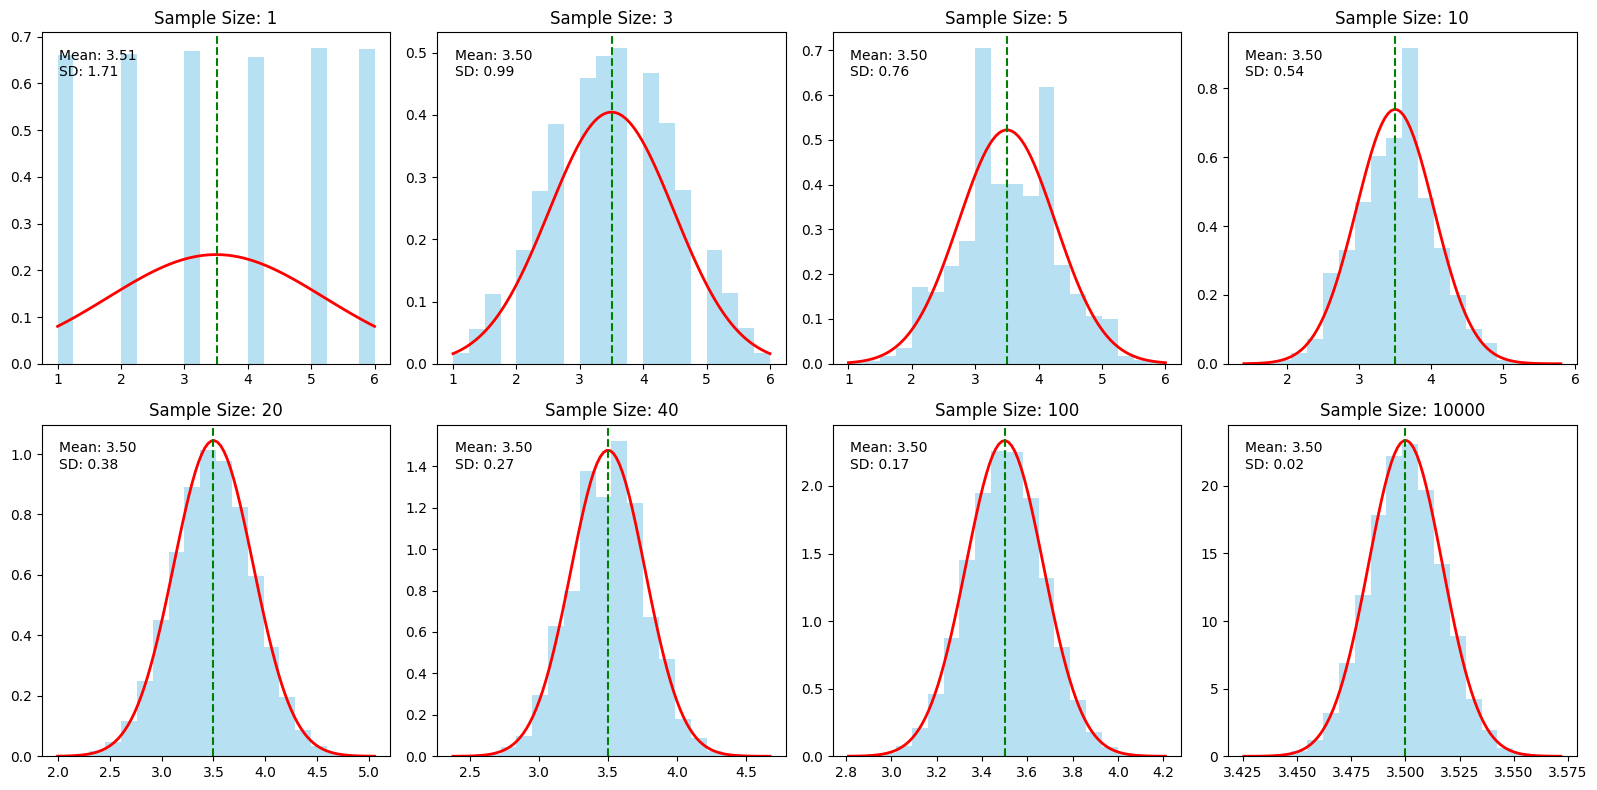

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the population distribution (Uniform(0, 6))
population = np.arange(1, 7)

# Sample sizes
sample_sizes = [1, 3, 5, 10, 20, 40, 100, 10000]

# Number of samples for each sample size
num_samples = 100000

# Create a figure and axes
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, n in enumerate(sample_sizes):
  # Generate sample means for the current sample size
  sample_means = []
  for _ in range(num_samples):
    sample = np.random.choice(population, size=n)
    sample_means.append(np.mean(sample))

  # Plot the histogram of sample means
  axs[i].hist(sample_means, bins=20, density=True, alpha=0.6, color='skyblue')
  axs[i].set_title(f'Sample Size: {n}')

  # Calculate the theoretical mean and standard deviation of the sampling distribution
  mu = np.mean(population)
  sigma = np.std(population) / np.sqrt(n)

  # Plot the normal distribution curve (red line)
  x = np.linspace(min(sample_means), max(sample_means), 100)
  y = norm.pdf(x, loc=mu, scale=sigma)
  axs[i].plot(x, y, color='red', linewidth=2)

  # Calculate and display mean and standard deviation of the sample means
  mean_sample_means = np.mean(sample_means)
  sd_sample_means = np.std(sample_means)
  axs[i].text(0.05, 0.95, f'Mean: {mean_sample_means:.2f}\nSD: {sd_sample_means:.2f}',
             transform=axs[i].transAxes, ha='left', va='top')

  # Add a mean line to the plot
  axs[i].axvline(mean_sample_means, color='green', linestyle='--', label='Mean of Sample Means')


plt.tight_layout()
plt.show()

## Summary

**Key Takeaways:**

* We generate multiple samples of various sizes from a uniform distribution (numbers 1-6).
* For each sample size, we calculate the sample means and plot their histogram.
* As the sample size increases, the histogram of sample means progressively resembles a normal distribution (shown by the red curve).
* The mean of the sample means approaches the population mean, and the standard deviation of the sample means decreases as the sample size grows, according to the CLT.


**Code Summary:**

1. Define the population as a discrete uniform distribution (numbers 1-6).
2. Set various sample sizes (1, 3, 5, 10, 20, 40, 100, 10000).
3. For each sample size, generate a large number of samples and compute their means.
4. Plot the histograms of these sample means for different sample sizes.
5. Overlay a theoretical normal distribution curve on each histogram, using the population mean and the standard deviation of the sample means.
6. Display the mean and standard deviation of the sample means on each plot for comparison.

**Observations:**

As the sample size increases, the following can be observed:

* **Shape:** The distribution of sample means becomes more bell-shaped, resembling a normal distribution.
* **Mean:** The mean of the sample means converges towards the population mean (3.5).
* **Standard Deviation:** The standard deviation of the sample means decreases, illustrating that with larger samples, the sample mean is more likely to be close to the population mean.

This showcases the CLT in action, highlighting how the distribution of sample means tends towards normality, regardless of the underlying population distribution, as the sample size grows.

---
## Binomial Distribution

* **Population Distribution:** Binomial distribution with parameters $n = 10$ (number of trials) and $p = 0.5$ (probability of success).
* **PMF:**
    $$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, ..., n$$
* **Sampling Distribution:**  As sample size increases, the sampling distribution of the sample mean approaches a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
    * $\mu = np = 10 \times 0.5 = 5$
    * $\sigma = \sqrt{np(1-p)} = \sqrt{10 \times 0.5 \times 0.5} = 1.5811$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# Define the parameters of the binomial distribution
n_trials = 10  # Number of trials
p_success = 0.5  # Probability of success

# Sample sizes
sample_sizes = [1, 3, 5, 10, 30, 100, 500]

# Number of samples for each sample size
num_samples = 10000

# Create a figure and axes
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, n in enumerate(sample_sizes):
  # Generate sample means for the current sample size
  sample_means = []
  for _ in range(num_samples):
    sample = binom.rvs(n_trials, p_success, size=n)
    sample_means.append(np.mean(sample))

  # Plot the histogram of sample means
  axs[i].hist(sample_means, bins=20, density=True, alpha=0.6, color='skyblue')
  axs[i].set_title(f'Sample Size: {n}')

  # Calculate the theoretical mean and standard deviation of the sampling distribution
  mu = n_trials * p_success
  sigma = np.sqrt(n_trials * p_success * (1 - p_success)) / np.sqrt(n)

  # Plot the normal distribution curve (red line)
  x = np.linspace(min(sample_means), max(sample_means), 100)
  y = norm.pdf(x, loc=mu, scale=sigma)
  axs[i].plot(x, y, color='red', linewidth=2)

plt.tight_layout()
plt.show()

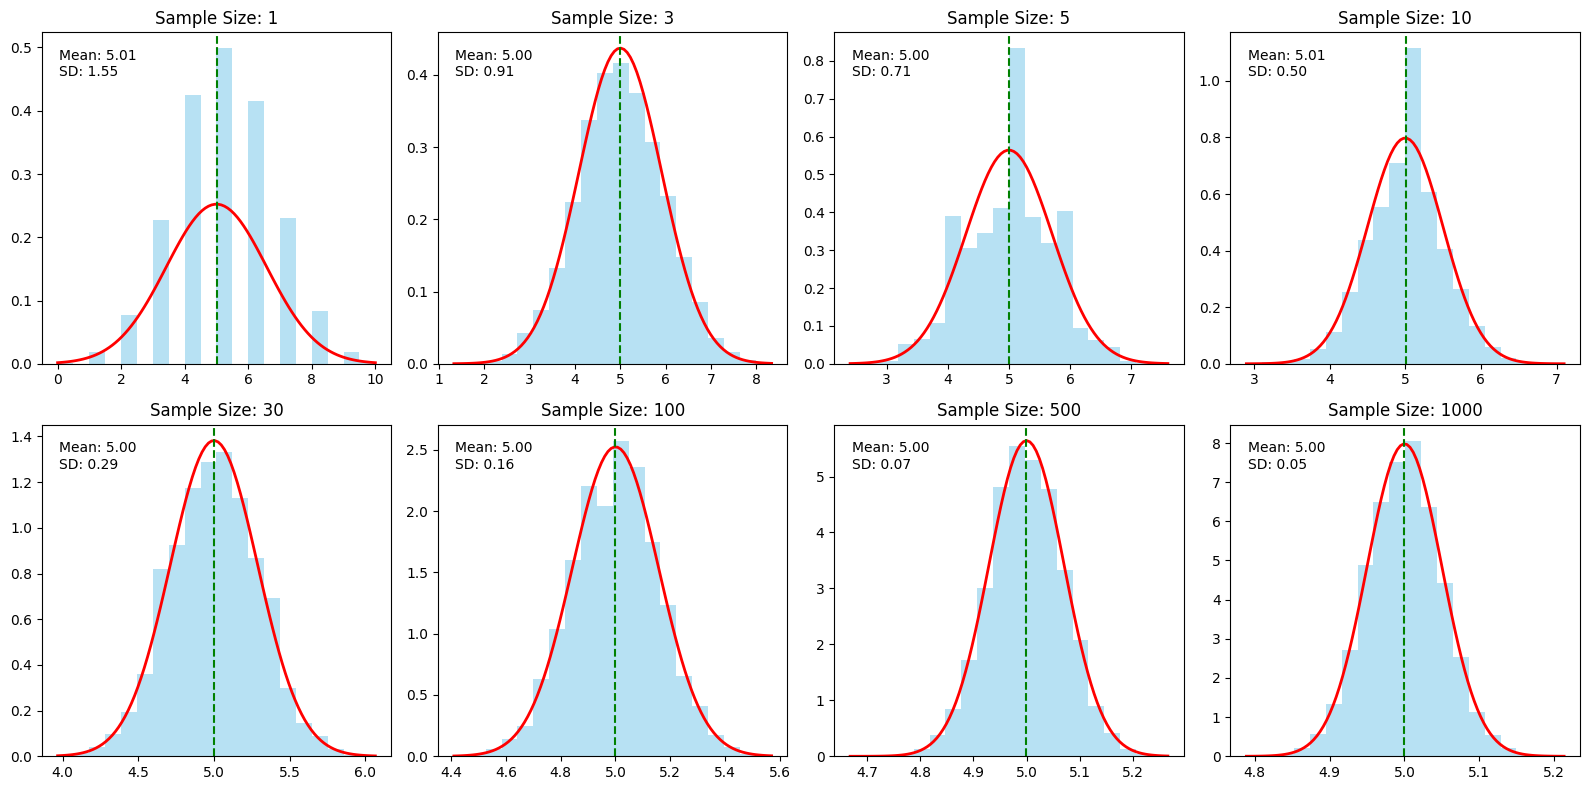

In [69]:
# prompt: for each sub graph, to binomial distribution and CLT show mean, sd, red line cruves and dash green line to show mean too

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom

# ## Binomial Distribution

# Sample sizes
sample_sizes = [1, 3, 5, 10, 30, 100, 500, 1000]

# Number of samples for each sample size
num_samples = 10000

# Create a figure and axes
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, n in enumerate(sample_sizes):
    # Generate sample means for the current sample size
    sample_means = []
    for _ in range(num_samples):
        sample = binom.rvs(n_trials, p_success, size=n)
        sample_means.append(np.mean(sample))

    # Plot the histogram of sample means
    axs[i].hist(sample_means, bins=20, density=True, alpha=0.6, color='skyblue')
    axs[i].set_title(f'Sample Size: {n}')

    # Calculate the theoretical mean and standard deviation of the sampling distribution
    mu = n_trials * p_success
    sigma = np.sqrt(n_trials * p_success * (1 - p_success)) / np.sqrt(n)

    # Plot the normal distribution curve (red line)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    y = norm.pdf(x, loc=mu, scale=sigma)
    axs[i].plot(x, y, color='red', linewidth=2)

    # Calculate and display mean and standard deviation of the sample means
    mean_sample_means = np.mean(sample_means)
    sd_sample_means = np.std(sample_means)
    axs[i].text(0.05, 0.95, f'Mean: {mean_sample_means:.2f}\nSD: {sd_sample_means:.2f}',
               transform=axs[i].transAxes, ha='left', va='top')

    # Add a mean line to the plot (dashed green line)
    axs[i].axvline(mean_sample_means, color='green', linestyle='--', label='Mean of Sample Means')


plt.tight_layout()
plt.show()

---
## Poisson Distribution
* **Population Distribution:** Poisson distribution with parameter $\lambda = 5$.
* **PMF:**
    $$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, ...$$
* **Sampling Distribution:** As sample size increases, the sampling distribution of the sample mean approaches a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
    * $\mu = \lambda = 5$
    * $\sigma = \sqrt{\lambda} = \sqrt{5} \approx 2.2361$

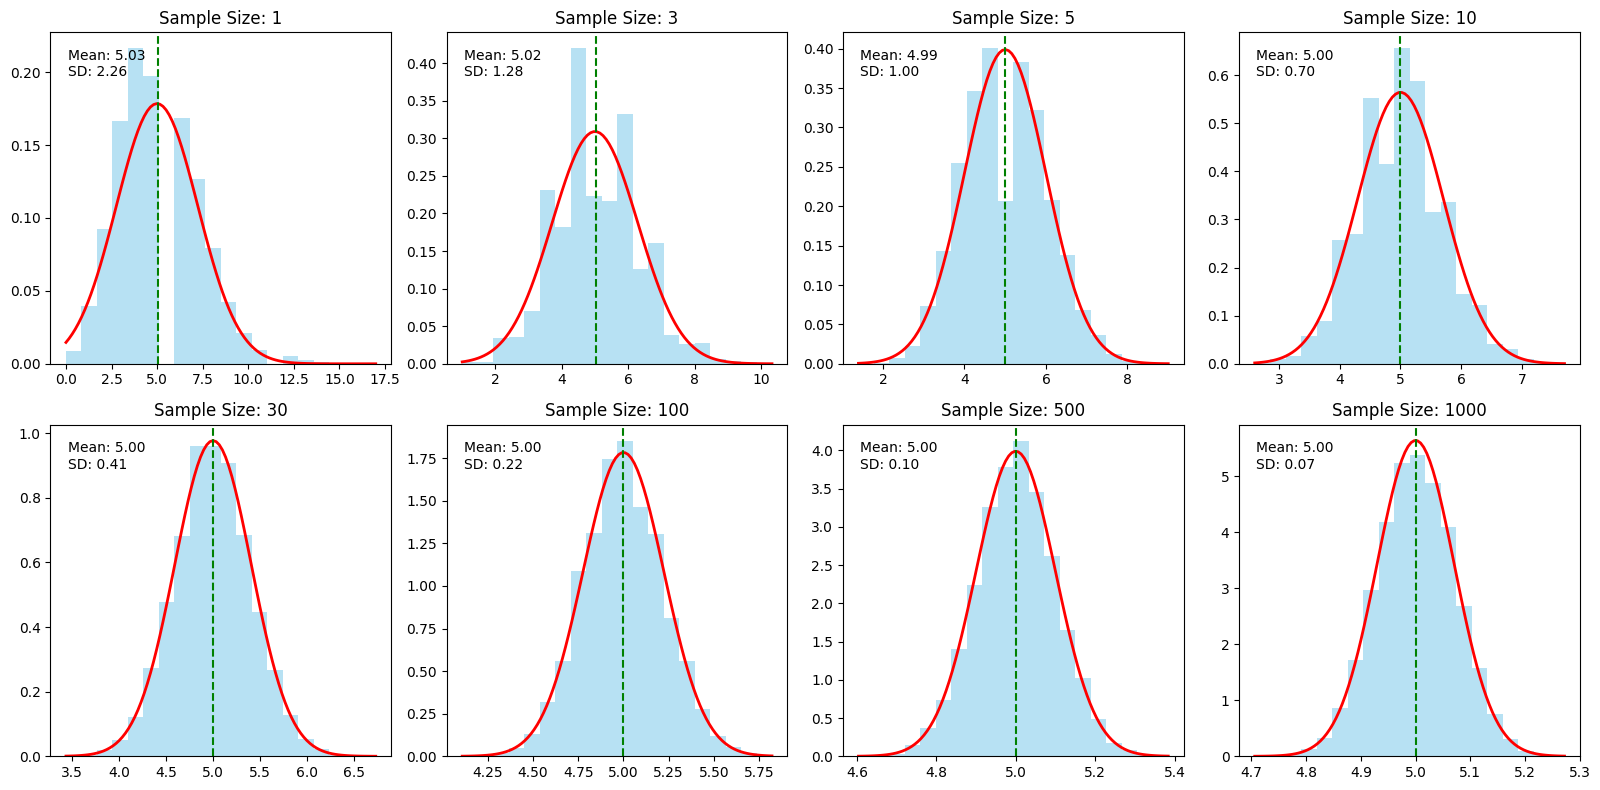

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

# Define the parameters of the Poisson distribution
lambda_param = 5  # Lambda parameter

# Sample sizes
sample_sizes = [1, 3, 5, 10, 30, 100, 500, 1000]

# Number of samples for each sample size
num_samples = 10000

# Create a figure and axes
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, n in enumerate(sample_sizes):
    # Generate sample means for the current sample size
    sample_means = []
    for _ in range(num_samples):
        sample = poisson.rvs(mu=lambda_param, size=n)
        sample_means.append(np.mean(sample))

    # Plot the histogram of sample means
    axs[i].hist(sample_means, bins=20, density=True, alpha=0.6, color='skyblue')
    axs[i].set_title(f'Sample Size: {n}')

    # Calculate the theoretical mean and standard deviation of the sampling distribution
    mu = lambda_param
    sigma = np.sqrt(lambda_param) / np.sqrt(n)

    # Plot the normal distribution curve (red line)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    y = norm.pdf(x, loc=mu, scale=sigma)
    axs[i].plot(x, y, color='red', linewidth=2)

    # Calculate and display mean and standard deviation of the sample means
    mean_sample_means = np.mean(sample_means)
    sd_sample_means = np.std(sample_means)
    axs[i].text(0.05, 0.95, f'Mean: {mean_sample_means:.2f}\nSD: {sd_sample_means:.2f}',
               transform=axs[i].transAxes, ha='left', va='top')

    # Add a mean line to the plot (dashed green line)
    axs[i].axvline(mean_sample_means, color='green', linestyle='--', label='Mean of Sample Means')


plt.tight_layout()
plt.show()

# Summary

**This notebook demonstrates the Central Limit Theorem (CLT) using different probability distributions.**


**The CLT states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the original population distribution.**


**It is mathematically formulated as:**
$$\bar{X} \approx N(\mu, \frac{\sigma}{\sqrt{n}}) \text{ as } n \to \infty$$
where $\bar{X}$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the population standard deviation, and $n$ is the sample size.


**The notebook explores three probability distributions:**


*   **Uniform (Discrete):**  A uniform distribution over the range {1, 2, 3, 4, 5, 6} with mean $\mu = 3.5$ and standard deviation $\sigma \approx 1.7078$.
*   **Binomial:** A binomial distribution with parameters $n = 10$ (number of trials) and $p = 0.5$ (probability of success), with mean $\mu = 5$ and standard deviation $\sigma = 1.5811$.
*   **Poisson:** A Poisson distribution with parameter $\lambda = 5$, with mean $\mu = 5$ and standard deviation $\sigma \approx 2.2361$.


**For each distribution, the notebook:**


1.  Generates multiple samples of different sizes.
2.  Calculates the sample mean for each sample.
3.  Plots the histogram of the sample means.
4.  Overlays a theoretical normal distribution curve on the histogram.


**The results show that as the sample size increases, the histogram of sample means increasingly resembles a normal distribution, as predicted by the CLT.**

**The notebook highlights the significance of the CLT in statistical inference, allowing us to make inferences about population parameters even when the population distribution is unknown or non-normal.**